# Data
- TF Data API
- TFRecord format
- ~~standard Keras preprocessing layers~~
- custom preprocessing layers
- ~~TFDS~~
- ~~tf.Transform~~

## Standard Imports

In [310]:
import tensorflow as tf
import matplotlib.pyplot as plt


# TF Dataset API

In [311]:
X = tf.range(10)
# a tensor
X

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [312]:
dataset = tf.data.Dataset.from_tensor_slices(X)

- What data will be in here? 
- What data frormat will this have?

In [313]:
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

- Hint:

In [314]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [315]:
# here's some cool functionality
dataset = dataset.repeat(3).batch(7, drop_remainder=True)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [316]:
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.repeat(2).batch(4, drop_remainder=True).map(lambda x: x * 2, num_parallel_calls=1)

- What will this be?

In [317]:
 dataset

<ParallelMapDataset shapes: (4,), types: tf.int32>

- Answer:

In [318]:
for item in dataset:
    print(item)

tf.Tensor([0 2 4 6], shape=(4,), dtype=int32)
tf.Tensor([ 8 10 12 14], shape=(4,), dtype=int32)
tf.Tensor([16 18  0  2], shape=(4,), dtype=int32)
tf.Tensor([ 4  6  8 10], shape=(4,), dtype=int32)
tf.Tensor([12 14 16 18], shape=(4,), dtype=int32)


In [319]:
dataset = dataset.unbatch()
# dataset = dataset.apply(tf.data.experimental.unbatch())

- What will this be?

In [320]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


In [321]:
dataset = dataset.filter(lambda x: x < 10).batch(5)

- What will this be?

In [323]:
for item in dataset:
    print(item)

tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)
tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)


- Which of these will produce only the top line above?

In [325]:
# for item in dataset.take(1):
for item in dataset.take(5):
    print(item)

tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)
tf.Tensor([0 2 4 6 8], shape=(5,), dtype=int32)


In [371]:
dataset = tf.data.Dataset.range(5).repeat(3) # 0 to 4, three times
dataset = dataset.shuffle(buffer_size=10000).batch(3) # `shuffle` has `seed` paramater, e.g., "seed=42"

for item in dataset:
    print(item)

tf.Tensor([0 2 3], shape=(3,), dtype=int64)
tf.Tensor([1 4 0], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([1 0 1], shape=(3,), dtype=int64)
tf.Tensor([3 4 2], shape=(3,), dtype=int64)


- How is `suffle` above with `buffer_size=2` working?
- (Hint #1: *batch is the last method applied*)
- (Hint #2: *watch where 0 and 4 can land*)

In [609]:
dataset = tf.data.Dataset.range(10).shuffle(buffer_size=5, reshuffle_each_iteration=False)
dataset = dataset.repeat(3).batch(10)
for item in dataset:
    print(item)


tf.Tensor([0 3 1 4 2 8 7 5 9 6], shape=(10,), dtype=int64)
tf.Tensor([0 3 1 4 2 8 7 5 9 6], shape=(10,), dtype=int64)
tf.Tensor([0 3 1 4 2 8 7 5 9 6], shape=(10,), dtype=int64)


- **WATCH OUT! Don't do the "shuffle-then-repeat" order above!**

If you're not shuffling, the same order will be repeated at each epoch, and the model may end up being biased (e.g., due to some spurious patterns present by chance in the source data’s order).

Here some things to think about!

1. linux `shuf` can shuffle an original file
2. if the original file is big
    1. split the source data into multiple files
    2. read them in a random order during training
        - or even better: pick multiple files randomly and read them simultaneously, interleaving their records
3. always have `tf.data.Dataset.shuffle` "on" 

This will help limit the potential for some weird "order bias" to affect things

## Demo: here's how we can do this in just a few lines of code
- **Going to use just use the pre-run from earlier today as the downloads were a bit flaky**


In [6]:
# https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
# https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/datasets/_california_housing.py#L53
# The original data can be found at:
# https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file
train_dataset_url = "https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz"
path = "/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/"
file = "calihousie.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=path+file, origin=train_dataset_url, untar=True, extract=True)


442368/441963 [==============================] - 3s 8us/step


- Note: the above only worked after a kernel restart and a few tries...?

In [10]:
path = '/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/'
! ls {path}

calihousie.csv.tar.gz


In [11]:
! gunzip {path}calihousie.csv.tar.gz 
! ls {path}

calihousie.csv.tar


In [12]:
! echo {path}

/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/


In [13]:
# https://askubuntu.com/questions/45349/how-to-extract-files-to-another-directory-using-tar-command
! tar -xvf {path}calihousie.csv.tar -C {path}

x CaliforniaHousing/cal_housing.data
x CaliforniaHousing/cal_housing.domain


In [14]:
! ls {path}

CaliforniaHousing  calihousie.csv.tar


In [16]:
! wc -l  {path}CaliforniaHousing/cal_housing.data

   20640 /Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data


### Everything below is just for functionality demonstration purposes

In [20]:
! tail -4096 {path}CaliforniaHousing/cal_housing.data > tmp
! mv tmp {path}CaliforniaHousing/cal_housing.data.test
! head -16544 {path}CaliforniaHousing/cal_housing.data > tmp
! mv tmp {path}CaliforniaHousing/cal_housing.data.train
! tail -4096 {path}CaliforniaHousing/cal_housing.data.train > tmp
! mv tmp {path}CaliforniaHousing/cal_housing.data.vali
! head -12448 {path}CaliforniaHousing/cal_housing.data > tmp
! mv tmp {path}CaliforniaHousing/cal_housing.data.train


In [17]:
# test + rest
4096+16544

20640

In [18]:
# rest + validation
12448+4096

16544

In [25]:
# test and validation can be split into 4 sets of 1024
2**12/4

1024.0

### Here we're going to pretend we had 6 "very large" separated data files, again for demonstration purposes

In [21]:
# https://blog.jpalardy.com/posts/how-to-shuffle-and-sample-on-the-command-line/
# brew install coreutils
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.1
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.2
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.3
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.4
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.5
! gshuf {path}CaliforniaHousing/cal_housing.data.train > {path}CaliforniaHousing/cal_housing.data.6
! ls {path}CaliforniaHousing 

cal_housing.data       cal_housing.data.4     cal_housing.data.train
cal_housing.data.1     cal_housing.data.5     cal_housing.data.vali
cal_housing.data.2     cal_housing.data.6     cal_housing.domain
cal_housing.data.3     cal_housing.data.test


In [200]:
# https://stackoverflow.com/questions/19031144/how-to-split-one-text-file-into-multiple-txt-files
! split -l 1024 {path}CaliforniaHousing/cal_housing.data.test {path}CaliforniaHousing/cal_housing.data.test.
! split -l 1024 {path}CaliforniaHousing/cal_housing.data.vali {path}CaliforniaHousing/cal_housing.data.vali.

In [24]:
! ls {path}CaliforniaHousing

cal_housing.data         cal_housing.data.test    cal_housing.data.vali.aa
cal_housing.data.1       cal_housing.data.test.aa cal_housing.data.vali.ab
cal_housing.data.2       cal_housing.data.test.ab cal_housing.data.vali.ac
cal_housing.data.3       cal_housing.data.test.ac cal_housing.data.vali.ad
cal_housing.data.4       cal_housing.data.test.ad cal_housing.domain
cal_housing.data.5       cal_housing.data.train
cal_housing.data.6       cal_housing.data.vali


### RAN THIS IN THE TERMINAL

- It is too challenging to make complex bash work through a notebook
- E.g., https://stackoverflow.com/questions/34972035/awk-print-with-pipes-not-working-ipython-in-jupyter-notebook
- and the one-liners get *very* long: https://www.cyberciti.biz/faq/linux-unix-bash-for-loop-one-line-command/


In [ ]:
# SO THIS WAS NOT RUN HERE: IT WAS RUN IN THE TERMINAL

# https://stackoverflow.com/questions/9506810/add-column-to-end-of-csv-file-using-awk-in-bash-script
# https://www.cyberciti.biz/faq/bash-for-loop/

path=/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/
for i in 1 2 3 4 5 6
do 
   cat "$path"CaliforniaHousing/cal_housing.data."$i" | awk -v i=$i -v OFS=, '{print i, $0}' > tmp
   mv tmp "$path"CaliforniaHousing/cal_housing.data."$i"
done    


In [198]:
! head {path}CaliforniaHousing/cal_housing.data.1

1,-118.450000,34.210000,30.000000,2331.000000,733.000000,2172.000000,707.000000,2.188800,195600.000000
1,-118.160000,34.600000,5.000000,7294.000000,1139.000000,3123.000000,930.000000,4.990400,154100.000000
1,-118.370000,34.190000,41.000000,2924.000000,867.000000,2751.000000,836.000000,2.100000,171600.000000
1,-117.820000,33.900000,25.000000,1137.000000,170.000000,524.000000,164.000000,7.574400,259300.000000
1,-120.020000,39.240000,24.000000,1602.000000,426.000000,751.000000,257.000000,1.760900,99300.000000
1,-118.050000,33.860000,16.000000,2676.000000,391.000000,1377.000000,395.000000,6.551300,350400.000000
1,-121.920000,36.570000,42.000000,3944.000000,738.000000,1374.000000,598.000000,4.174000,394400.000000
1,-118.150000,34.210000,34.000000,2765.000000,515.000000,1422.000000,438.000000,5.472700,238900.000000
1,-117.800000,33.900000,22.000000,3760.000000,482.000000,1485.000000,461.000000,7.853700,354900.000000
1,-115.600000,33.040000,31.000000,314.000000,61.000000,152.000000,56.000000,

In [199]:
! head {path}CaliforniaHousing/cal_housing.data.2

2,-118.140000,34.090000,20.000000,3447.000000,1007.000000,2622.000000,934.000000,2.918000,208700.000000
2,-118.340000,33.830000,34.000000,1761.000000,329.000000,965.000000,329.000000,5.399000,358500.000000
2,-122.030000,37.530000,18.000000,1746.000000,437.000000,1268.000000,404.000000,3.256000,183300.000000
2,-121.280000,38.750000,52.000000,493.000000,89.000000,189.000000,94.000000,2.108000,83800.000000
2,-119.640000,36.820000,14.000000,4872.000000,656.000000,2085.000000,617.000000,5.673900,173800.000000
2,-118.150000,33.770000,39.000000,2428.000000,634.000000,1312.000000,612.000000,2.721200,266300.000000
2,-119.450000,35.160000,34.000000,3437.000000,696.000000,1783.000000,608.000000,2.391200,52900.000000
2,-118.220000,34.660000,17.000000,3810.000000,662.000000,1867.000000,586.000000,4.900000,152400.000000
2,-118.090000,33.890000,42.000000,991.000000,215.000000,717.000000,219.000000,4.092600,164400.000000
2,-118.470000,34.000000,38.000000,1235.000000,390.000000,891.000000,376.000000,2.

- **Starting up live coding again**

In [380]:
path = '/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/'
# watch out! this won't work!
#train_filepaths = path+'CaliforniaHousing/cal_housing.data.*'
train_filepaths = path+'CaliforniaHousing/cal_housing.data.[0-9]'
train_filepaths

'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.[0-9]'

In [384]:
vali_filepaths = path+'CaliforniaHousing/cal_housing.data.vali.*'
test_filepaths = path+'CaliforniaHousing/cal_housing.data.test.*'

In [386]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths)#, seed=42)
for item in filepath_dataset.take(2):
    print(item)

tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.2', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.1', shape=(), dtype=string)


In [407]:
for item in filepath_dataset.take(2):
    print(item)

tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.4', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.2', shape=(), dtype=string)


- How many more times can I run the above?

In [388]:
for item in filepath_dataset:
    print(item)


tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.3', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.6', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.1', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.4', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.5', shape=(), dtype=string)
tf.Tensor(b'/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/CaliforniaHousing/cal_housing.data.2', shape=(), dtype=string)


In [409]:
n_readers = 3
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath), # add `.skip(1)`, if header present
    cycle_length=n_readers,
    num_parallel_calls=1)#tf.data.experimental.AUTOTUNE

In [412]:
i=0

# taking enough to get through the first 3 files
for item in dataset.take(3*12448+10):
    
    # printing out the first 10 and the next 10 after we get through the first three files
    if i<10 or i>3*12448:
        print(item.numpy())
    if i==10:
        print('.\n.\n.\n')

    i+=1


b'6,-117.790000,33.690000,16.000000,3067.000000,396.000000,1275.000000,372.000000,8.738500,340000.000000'
b'2,-118.140000,34.090000,20.000000,3447.000000,1007.000000,2622.000000,934.000000,2.918000,208700.000000'
b'5,-117.750000,34.070000,52.000000,2550.000000,586.000000,1246.000000,576.000000,1.600600,146200.000000'
b'6,-118.200000,33.970000,43.000000,825.000000,212.000000,820.000000,184.000000,1.889700,174300.000000'
b'2,-118.340000,33.830000,34.000000,1761.000000,329.000000,965.000000,329.000000,5.399000,358500.000000'
b'5,-117.350000,33.690000,11.000000,1229.000000,236.000000,581.000000,190.000000,3.102000,111300.000000'
b'6,-119.120000,35.390000,13.000000,1264.000000,202.000000,552.000000,187.000000,4.590300,94300.000000'
b'2,-122.030000,37.530000,18.000000,1746.000000,437.000000,1268.000000,404.000000,3.256000,183300.000000'
b'5,-118.390000,34.190000,41.000000,2000.000000,485.000000,1439.000000,461.000000,3.049100,192000.000000'
b'6,-118.310000,33.750000,36.000000,2715.000000,474

- So what's the scheme here?

In [413]:
#X_mean, X_std = [...] # mean and scale of each feature in the training set
n_inputs = 8 # we've added the file indicator

def preprocess(line):
    
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)] # making it a tensor
    fields = tf.io.decode_csv(line, select_cols=list(range(1,10)), record_defaults=defs) # list of tensor objects
                                                                                         # sans file indicator column
    x = tf.stack(fields[:-1]) # stack them into a feature vector (tensor datatype)
    y = tf.stack(fields[-1:]) # create the corresponding output dimensions
    #return (x - X_mean) / X_std, y
    return x, y

In [414]:
preprocess(b'1, -117.940000,34.150000,33.000000,859.000000,144.000000,421.000000,138.000000,4.482100,220100.000000')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([-117.94  ,   34.15  ,   33.    ,  859.    ,  144.    ,  421.    ,
         138.    ,    4.4821], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([220100.], dtype=float32)>)

In [415]:
final_dataset = dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)


In [416]:
i = 1
t = [0]
for row in final_dataset.shuffle(1).repeat(1).batch(1):
    t += row[0]
    i += 1

m = t/i
s = [0]
for row in final_dataset.shuffle(1).repeat(1).batch(1):
    s += (row[0]-m)**2

s = (s/(i-1))**(-1)

In [417]:
m

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[-119.18004  ,   35.26199  ,   29.80463  , 2566.094    ,
         532.48895  , 1424.7582   ,  493.85574  ,    3.8675482]],
      dtype=float32)>

In [418]:
s

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[3.1233069e-01, 2.6048949e-01, 6.6820947e-03, 2.0612947e-07,
        5.4441530e-06, 7.9547368e-07, 6.6604612e-06, 2.6287237e-01]],
      dtype=float32)>

In [419]:
X_mean, X_std = m,s # mean and scale of each feature in the training set

def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, select_cols=list(range(1,10)), record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y


In [ ]:
def csv_reader_dataset(filepaths, n_readers=2, n_read_threads=tf.data.experimental.AUTOTUNE,
                       shuffle_buffer_size=10000, repeat=1, 
                       n_parse_threads=tf.data.experimental.AUTOTUNE,
                       batch_size=32):
    
    # building the interleaved data set just as we did above
    dataset = tf.data.Dataset.list_files(filepaths)
    dataset = dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath),
                                 cycle_length=n_readers, 
                                 num_parallel_calls=n_read_threads)
                                 # so that's the first row of arguments
                                     
    # now we have a rolling window, and we repeat that data set some number of duplications 
    dataset = dataset.shuffle(shuffle_buffer_size).repeat(repeat)
    # `reshuffle_each_iteration=True` is the default in `shuffle`, so each repeat order will vary
    
    # and when the data comes out, we standarize it, and this may be threaded
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    
    # finally we set the batch, and possibly get the next batch ready 
    # while the current batch is proocessing through the NN
    return dataset.batch(batch_size).prefetch(1)

### Note:

- If you have enough RAM, you might not want to re-preprocess at each epoch
- There is a `.cache()` method for TF Datasets that avoids this
- while still shuffling, repeating, batching, and prefetching distinctly at each epoch

*Of course, you can always pre-preprocess...*

There are some other potentially useful data processing capabilities that might do just the trick for what you need in any given circumnstance:
- `concatenate()`
- `zip()`
- `window()`
- `reduce()`
- `shard()`
- `flat_map()` 
- `padded_batch()`
- `from_generator()`
- `from_tensors()`
- `tf.data.experimental`
    - `CsvDataset`
    - `make_csv_dataset()`

### Going to skip this for now -- the basic idea should be clear
- however because only the *train_filepaths* have the extra file indicator column we added, we would need to define the correct csv_reader_dataset2 to use on the *test_filepaths* and *vali_filepaths* 

In [39]:
train_dataset = csv_reader_dataset(train_filepaths)
validation_dataset = csv_reader_dataset2(vali_filepaths)
test_dataset = csv_reader_dataset2(test_filepaths)


In [90]:
# instead of adding preprocessing in the map, you could also add it as a layer here
# the "Hands-On ML" textbook walks through a couple ways to that:
# - Lambda layer
# - Custom layer
# - `tf.keras.layers.Normalization`

model = tf.keras.Sequential([
  tf.keras.Input(shape=(1,8,)),
  tf.keras.layers.Dense(1024),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(256),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(1)
])


model.compile(optimizer='rmsprop', loss=tf.keras.losses.MAE)
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
history = model.fit(train_dataset, epochs=3, validation_data=validation_dataset)

Epoch 1/3
4771/4771 [==============================] - 75s 16ms/step - loss: 205509.9688 - val_loss: 180268.1562
Epoch 2/3
4771/4771 [==============================] - 77s 16ms/step - loss: 198368.3281 - val_loss: 169853.0625
Epoch 3/3
4771/4771 [==============================] - 79s 17ms/step - loss: 184238.6562 - val_loss: 152307.3906


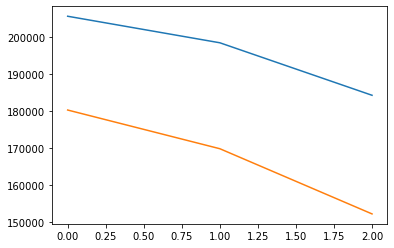

In [92]:
#history.history.keys()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

In [93]:
#model.evaluate(train_dataset)
model.evaluate(test_dataset)

4771/4771 [==============================] - 6s 1ms/step - loss: 174910.2344


174910.234375

In [97]:
new_set = test_dataset.take(1).map(lambda X, y: X) # take returns a batch
model.predict(new_set)[:3,0,0] # a dataset containing new instances
# just looking at first 3 of the new instances

array([36999.676, 36773.45 , 37088.066], dtype=float32)

# TFRecord

In [ ]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [ ]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

In [ ]:
! head my_data.tfrecord

In [ ]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")    

In [ ]:
! head my_compressed.tfrecord

In [ ]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"])
#dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
#                                  compression_type="GZIP")



In [ ]:
for item in dataset.take(2):
    print(item.numpy())

- So it knows how to read itself

## Let's return to the previous data set we were looking at:

In [ ]:
train_dataset = csv_reader_dataset(train_filepaths)

for item in train_dataset.take(1):
    print(item)
    

- We're going to package it up in a TFRecord form

In [ ]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [ ]:
calihouse_example = Example(
    features=Features(
        feature={
# Example from textbook looked something like this:    
#             "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
#             "id": Feature(int64_list=Int64List(value=[123])),
#             "emails": Feature(bytes_list=BytesList(value=[b"a@b.com", b"c@d.com"]))
            "longitude": Feature(float_list=FloatList(value=[item[0][0,0,0].numpy()])),
            "latitude": Feature(float_list=FloatList(value=[item[0][0,0,1].numpy()])),
            "housingMedianAge": Feature(float_list=FloatList(value=[item[0][0,0,2].numpy()])),
            "totalRooms": Feature(float_list=FloatList(value=[item[0][0,0,3].numpy()])),
            "totalBedrooms": Feature(float_list=FloatList(value=[item[0][0,0,4].numpy()])),
            "population": Feature(float_list=FloatList(value=[item[0][0,0,5].numpy()])),
            "households": Feature(float_list=FloatList(value=[item[0][0,0,6].numpy()])),
            "medianIncome": Feature(float_list=FloatList(value=[item[0][0,0,7].numpy()])),
            "medianHouseValue": Feature(float_list=FloatList(value=[item[1][0].numpy()]))
        }))

calihouse_example

- Now we write it out to a file as a `TFRecord`:

In [ ]:
with tf.io.TFRecordWriter("calihousie.tfrecord") as f:
    f.write(calihouse_example.SerializeToString())
    f.write(calihouse_example.SerializeToString())    

In [ ]:
! head calihousie.tfrecord

In [ ]:
dataset = tf.data.TFRecordDataset(["calihousie.tfrecord"])
for item in dataset.take(2):
    print(item)
    print()

In [ ]:
item.numpy()

In [ ]:
example = Example()
for i,item in enumerate(dataset.take(2)):
    print(i)
    example.ParseFromString(item.numpy())
    print(example)



In [ ]:
feature_description = {
            "longitude": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "latitude": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "housingMedianAge": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "totalRooms": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "totalBedrooms": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "population": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "households": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "medianIncome": tf.io.FixedLenFeature([], tf.float32, default_value=0),
            "medianHouseValue": tf.io.VarLenFeature(tf.float32)
}
# https://stackoverflow.com/questions/41921746/tensorflow-varlenfeature-vs-fixedlenfeature

for serialized_example in tf.data.TFRecordDataset(["calihousie.tfrecord"]):
    parsed_example = tf.io.parse_single_example(serialized_example,
                                                feature_description)
    
parsed_example

In [ ]:
parsed_example['households']

In [ ]:
parsed_example['medianHouseValue']

In [ ]:
parsed_example['medianHouseValue'].values

In [ ]:
tf.sparse.to_dense(parsed_example["medianHouseValue"], default_value=0)

- Some data will be variable, and not just like different sized images

### Here is how batching is done:

In [ ]:
for serialized_examples in tf.data.TFRecordDataset(["calihousie.tfrecord"]).batch(2):
    parsed_examples = tf.io.parse_example(serialized_examples,
                                          feature_description)
parsed_examples

### Data storage for images:
- `Feature(bytes_list=BytesList(value=tf.io.encode_jpeg()))`?
    - `tf.io.decode_jpeg()`
    - `tf.io.decode_image()`

### Data storage for sequences; i.e., "lists of lists" stuff:
- `SequenceExample`
    - `tf.io.parse_single_sequence_example()`
    - `tf.io.parse_sequence_example()`
    - `tf.RaggedTensor.from_sparse()`

*Some code lifted from the notebook provided with the chapter:*
```
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(serialized_sequence_example,
                                                                           context_feature_descriptions,
                                                                           sequence_feature_descriptions)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["content"])
```

### And you can store tensors themselves

- `Feature(bytes_list=BytesList(value=tf.io.serialize_tensor()))`?
    - `tf.io.parse_tensor()` 



# Places where you can get some data
https://learning.oreilly.com/library/view/Hands-On+Machine+Learning+with+Scikit-Learn,+Keras,+and+TensorFlow,+2nd+Edition/9781492032632/ch02.html#project_chapter


[TFDS](https://homl.info/tfds)

[UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/)

[Kaggle datasets](https://www.kaggle.com/datasets)

[Amazon’s AWS datasets](https://registry.opendata.aws/)


[Data Portals](http://dataportals.org/)

[OpenDataMonitor](http://opendatamonitor.eu/)

[Quandl](http://quandl.com/)

[Wikipedia’s list of Machine Learning datasets](https://homl.info/9)

[Quora.com](https://homl.info/10)

[The datasets subreddit](https://www.reddit.com/r/datasets)



In [169]:
# https://anaconda.org/anaconda/tensorflow-datasets
! yes y | conda install -c anaconda tensorflow-datasets

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

^C


In [170]:
# https://www.tensorflow.org/datasets/overview
! pip install tensorflow-datasets

     |████████████████████████████████| 3.6 MB 503 kB/s eta 0:00:01
     |████████████████████████████████| 70 kB 671 kB/s eta 0:00:01
     |████████████████████████████████| 829 kB 634 kB/s eta 0:00:01
     |████████████████████████████████| 81 kB 667 kB/s eta 0:00:01
     |████████████████████████████████| 44 kB 735 kB/s eta 0:00:01
     |████████████████████████████████| 100 kB 674 kB/s ta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=16e450f0a7fda57ac402ea2ae3b5b07286d8567d30b6c7df01b0432579fdba59
  Stored in directory: /Users/gck8gd/Library/Caches/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=d5fa90510e04a58d8d8f7c6091ac9df93c90c4bef3766386292f801c97418089
  Stored in directory: /Users/gck8gd/Library/Caches/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built promise future


In [173]:
# https://ipywidgets.readthedocs.io/en/stable/user_install.html
! yes y | conda install -c conda-forge ipywidgets

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/gck8gd/opt/anaconda3/envs/deep_learning_6018

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.11.8  |       h033912b_0         145 KB  conda-forge
    certifi-2020.11.8          |   py38h50d1736_0         150 KB  conda-forge
    ipywidgets-7.5.1           |     pyh9f0ad1d_1         101 KB  conda-forge
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    widgetsnbextension-3.5.1   |   py38h32f6830_4         1.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:   

In [3]:
# https://stackoverflow.com/questions/57343134/jupyter-notebooks-not-displaying-progress-bars
# ` brew install node`
! jupyter nbextension enable --py widgetsnbextension
# did not have to complete this:
#! yes y | jupyter labextension install @jupyter-widgets/jupyterlab-manager
# but note that I did need to follow this direction:
# 'It should work now after refreshing the Jupyter browser tab.'

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
import tensorflow_datasets as tfds
# ! rm -r /Users/gck8gd/tensorflow_datasets/bool_q
dataset = tfds.load(name="bool_q", shuffle_files=True)#, batch_size=32, as_supervised=True)
dataset.keys()

dict_keys(['train', 'validation'])

In [4]:
dataset = tfds.load(name="bool_q", shuffle_files=True, batch_size=32, as_supervised=True)


ValueError: as_supervised=True but bool_q does not support a supervised (input, label) structure.

In [26]:
next(iter(dataset['validation'].take(1)))

{'answer': <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 'passage': <tf.Tensor: shape=(), dtype=string, numpy=b"Sony has licensed Digital8 technology to at least one other firm (Hitachi), which marketed a few models for a while; but as of October 2005 only Sony sells Digital8 consumer equipment. Digital8's main rival is the consumer MiniDV format, which uses narrower tape and a correspondingly smaller cassette shell. Since both technologies share the same logical audio/video format, Digital8 can theoretically equal MiniDV or even DVCAM in A/V performance. But as of 2005, Digital8 has been relegated to the entry-level camcorder market, where price, not performance, is the driving factor. Meanwhile, MiniDV is the de facto standard of the domestic digital tape camcorder market.">,
 'question': <tf.Tensor: shape=(), dtype=string, numpy=b'are mini dv tapes the same as 8mm'>,
 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'8 mm video format'>}

In [27]:
next(iter(dataset['validation'].take(1))).keys()

dict_keys(['answer', 'passage', 'question', 'title'])

In [111]:
next(iter(dataset['validation'].take(1)))['passage']

<tf.Tensor: shape=(), dtype=string, numpy=b'Death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. Instances of death by laughter have been recorded from the times of ancient Greece to the modern day.'>

In [108]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization
#https://towardsdatascience.com/you-should-try-the-new-tensorflows-textvectorization-layer-a80b3c6b00ee 
tf.keras.layers.experimental.preprocessing.TextVectorization?


In [61]:
TextVectorization = tf.keras.layers.experimental.preprocessing.TextVectorization

vectorize_layer = TextVectorization(
    max_tokens=500,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int')


In [62]:
# https://stackoverflow.com/questions/50737192/tf-data-dataset-how-to-get-the-dataset-size-number-of-elements-in-a-epoch
tf.data.experimental.cardinality(dataset['validation']).numpy()

3270

In [63]:
vectorize_layer.adapt?

In [64]:
vectorize_layer.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)


In [65]:
dir(vectorize_layer)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__metaclass__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_state_variable',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_same_type',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_called',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_combiner',
 '_compute_dtype',
 '_compute_dtype_object',
 '_convert_

In [66]:
vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'of',
 'and',
 'in',
 'a',
 'to',
 'is',
 'as',
 'by',
 'on',
 'for',
 'with',
 'or',
 'was',
 'it',
 'that',
 'are',
 'from',
 'an',
 'be',
 'at',
 'which',
 'not',
 'has',
 'also',
 'have',
 'states',
 'its',
 'their',
 'united',
 'series',
 'this',
 'one',
 'first',
 'they',
 'but',
 'other',
 'film',
 'may',
 'new',
 'two',
 'his',
 'season',
 'after',
 'can',
 'world',
 'he',
 'been',
 'used',
 'all',
 'her',
 'most',
 'who',
 'when',
 'were',
 'only',
 'into',
 'such',
 'american',
 'time',
 'us',
 'than',
 'more',
 'state',
 'known',
 'some',
 'between',
 'if',
 'she',
 '2018',
 'while',
 'had',
 '2017',
 'there',
 'no',
 'since',
 'however',
 'being',
 'game',
 'years',
 'during',
 'cup',
 'any',
 'over',
 'both',
 'same',
 'many',
 'three',
 'under',
 'second',
 'called',
 'about',
 'will',
 'law',
 'where',
 'team',
 'through',
 'up',
 'including',
 'games',
 'would',
 'each',
 'city',
 'use',
 'these',
 'often',
 'national',
 'number',
 'name',
 'befo

In [67]:
len(vectorize_layer.get_vocabulary())

500

In [68]:
next(iter(dataset['validation'].map(lambda items: items['passage']).take(1))).numpy()


b'Death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. Instances of death by laughter have been recorded from the times of ancient Greece to the modern day.'

In [70]:
vectorize_layer(next(iter(dataset['validation'].map(lambda items: items['passage']).take(1))))

<tf.Tensor: shape=(40,), dtype=int64, numpy=
array([326,  19,   1,   8,   6,   1, 194,   3, 326, 129,   1,  19,   1,
         1,  14,   1,   1,  10,   6,   1,   3,   1,   1,   3, 326,  10,
         1,  27,  49,   1,  19,   2, 227,   3,   1,   1,   7,   2,   1,
       154])>

In [71]:
vectorize_layer.get_weights()


[array([b'[UNK]', b'', b'certain', b'county', b'depending', b'france',
        b'instead', b'police', b'square', b'street', b'energy', b'green',
        b'head', b'led', b'license', b'mother', b'network', b'officially',
        b'refers', b'river', b'language', b'throughout', b'aired', b'get',
        b'uk', b'13', b'control', b'approximately', b'building', b'color',
        b'degree', b'republic', b'speed', b'division', b'except', b'food',
        b'level', b'london', b'love', b'john', b'given', b'population',
        b'side', b'franchise', b'ireland', b'said', b'great', b'work',
        b'hand', b'lead', b'northern', b'southern', b'texas', b'7',
        b'could', b'open', b'various', b'blue', b'fifth', b'studios',
        b'developed', b'includes', b'11', b'rights', b'trophy',
        b'national', b'dead', b'18', b'sea', b'case', b'never', b'point',
        b'sold', b'are', b'part', b'association', b'see', b'together',
        b'list', b'union', b'order', b'16', b'become', b'will', b

In [102]:
vectorize_layer_info = TextVectorization(
    max_tokens=500,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='int',
    output_sequence_length=20)#100

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1))))


<tf.Tensor: shape=(2, 20), dtype=int64, numpy=
array([[326,  19,   1,   8,   6,   1, 194,   3, 326, 129,   1,  19,   1,
          1,  14,   1,   1,  10,   6,   1],
       [  2, 177,   1,   8,   2,  57,   1, 236,   3,   2,   1,   1,   4,
          2, 136,   1,  16,  25,  49,   1]])>

In [104]:
vectorize_layer_info = TextVectorization(
    max_tokens=50,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='binary',
    pad_to_max_tokens=True)

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1))))


<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0.]], dtype=float32)>

In [105]:
vectorize_layer_info = TextVectorization(
    max_tokens=50,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='count',
    pad_to_max_tokens=True)

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1))))



<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[22.,  2.,  4.,  0.,  0.,  2.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [41.,  9.,  3.,  3.,  2.,  1.,  1.,  4.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]],
      dtype=float32)>

In [107]:
vectorize_layer_info = TextVectorization(
    max_tokens=50,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    output_mode='tf-idf',
    pad_to_max_tokens=True)

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1))))



<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[15.245874  ,  1.4230618 ,  3.069777  ,  0.        ,  0.        ,
         1.6252658 ,  0.8878175 ,  0.88448596,  0.        ,  2.2482414 ,
         0.        ,  0.        ,  0.        ,  1.3620235 ,  0.        ,
         0.        ,  0.        ,  0.        ,  4.27833   ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.8501315 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.1420925 ,  0.        ],
       [28.412766  ,  6.403778  ,  2.3023329 ,  2.3154607 ,  1.6088053 ,
         0.8126329 ,  0.8878175 ,  3.5379438 ,  0.        ,  0.        ,
         0.        ,  1.1812017 ,  1.2147837 ,  0.        ,  0.        ,
 

In [159]:
vectorize_layer_info = TextVectorization(
    max_tokens=500,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=5,
    output_mode='int',
    output_sequence_length=None)

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1))))



<tf.Tensor: shape=(1, 190), dtype=int64, numpy=
array([[436,  21,   1,   8,   6,   1, 255,   3, 436, 167,   1,  21,   1,
          1,  16,   1,   1,  11,   6,   1,   3,   1,   1,   3, 436,  11,
          1,  31,  64,   1,  21,   2, 294,   3,   1,   1,   7,   2,   1,
        204,   1,   1,   1,  25,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1, 234,   1,   1,   1,   1,   1,   1,   1,
          1,   1, 217,   1,   1,  72,   1,   1,   1,   1,   1,  27,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
   

In [160]:
next(iter(dataset['validation'].map(lambda items: items['passage']).take(1)))

<tf.Tensor: shape=(), dtype=string, numpy=b'Death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. Instances of death by laughter have been recorded from the times of ancient Greece to the modern day.'>

In [161]:
# dir(vectorize_layer_info)
encoding = {k:v for v,k in zip(*vectorize_layer_info.get_weights())}
uncoded = b''

tmp = vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1)))).numpy()[0]
for token in tmp:
    uncoded += b' '+encoding[token]
uncoded

b' death from [UNK] is a [UNK] form of death usually [UNK] from [UNK] [UNK] or [UNK] [UNK] by a [UNK] of [UNK] [UNK] of death by [UNK] have been [UNK] from the times of [UNK] [UNK] to the [UNK] day [UNK] [UNK] [UNK] is a [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] by a [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] have been [UNK] [UNK] from the [UNK] [UNK] [UNK] [UNK] [UNK] to the [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK

In [162]:
vectorize_layer_info.get_weights()

[array([b'[UNK]', b'', b'become', b'the term', b'history', b'relationship',
        b'seasons', b'see', b'20', b'available', b'free', b'standard',
        b'within the', b'at least', b'down', b'england', b'thus', b'top',
        b'was a', b'islands', b'oil', b'that is', b'size',
        b'television series', b'from a', b'km', b'the ball', b'have a',
        b'it has', b'card', b'it is a', b'used to', b'australia', b'local',
        b'5', b'death', b'sequel', b'title', b'do not', b'stars',
        b'the united kingdom', b'there is', b'the last', b'used in',
        b'episode', b'2012', b'drama', b'base', b'carry', b'december',
        b'early', b'the third', b'august', b'line', b'published', b'using',
        b'character', b'required', b'premiered on', b'11', b'make',
        b'november', b'considered', b'force', b'novel', b'renewed', b'day',
        b'result', b'xbox', b'west', b'long', b'began', b'major', b'off',
        b'world', b'later', b'production', b'months', b'order',
        

In [188]:
next(iter(dataset['validation'].map(lambda items: items['passage']).take(1)))

<tf.Tensor: shape=(), dtype=string, numpy=b'Death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. Instances of death by laughter have been recorded from the times of ancient Greece to the modern day.'>

In [194]:
max_features = 5000
vectorize_layer_info = TextVectorization(
    max_tokens=max_features,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=5,
    output_mode='int',
    output_sequence_length=None)

vectorize_layer_info.adapt(dataset['validation'].map(lambda items: items['passage']).batch(64), reset_state=True)

vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).take(1))))

<tf.Tensor: shape=(190,), dtype=int64, numpy=
array([ 436,   21,    1,    8,    6, 1708,  255,    3,  436,  167, 1342,
         21, 4312,    1,   16,    1, 1161,   11,    6,    1,    3,    1,
          1,    3,  436,   11,    1,   31,   64, 1181,   21,    2,  294,
          3, 4021,    1,    7,    2,  766,  204,    1,    1,    1,   25,
          1,    1,  772,    1,    1,    1,    1,    1,    1,    1,    1,
          1, 1672,  234,    1,    1,    1,    1,    1,    1,    1,    1,
          1,  217,    1,    1,   72,    1,    1,    1,    1,    1,   27,
       4812,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
     

In [202]:

# dir(vectorize_layer_info)
encoding = {k:v for v,k in zip(*vectorize_layer_info.get_weights())}
uncoded = b''

tmp = vectorize_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1))))
for i,token in enumerate(tmp.numpy()[0]):
    #print(i, encoding[token])
    uncoded += encoding[token]+b' '
uncoded


b'death from [UNK] is a rare form of death usually resulting from cardiac [UNK] or [UNK] caused by a [UNK] of [UNK] [UNK] of death by [UNK] have been recorded from the times of ancient [UNK] to the modern day [UNK] [UNK] [UNK] is a [UNK] [UNK] form of [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] caused by by a [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] have been [UNK] [UNK] from the [UNK] [UNK] [UNK] [UNK] [UNK] to the the modern [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] 

In [207]:
# https://stackoverflow.com/questions/606191/convert-bytes-to-a-string
len(next(iter(dataset['validation'].map(lambda items: items['passage']).take(1))).numpy().decode("utf-8").split())

40

In [208]:
length = 0
for ngram in range(5):
    length += 40-ngram
length    

190

In [209]:
sorted(vectorize_layer_info.get_vocabulary(), key=lambda x: -len(x))[:10]

['superfecundation refers to the fertilization',
 'the fertilization of two separate',
 'fertilization of two separate ova',
 'national basketball association',
 'heteropaternal superfecundation',
 'government of the united states',
 'the united states constitution',
 'superfecundation refers to the',
 'refers to the fertilization of',
 'arrival to and departure from']

In [213]:
'superfecundation' in vectorize_layer_info.get_vocabulary()

True

In [222]:
model = tf.keras.models.Sequential()
model.add(vectorize_layer_info)
# tf.one_hot?
model.add(tf.keras.layers.Lambda(lambda inputs: tf.one_hot(inputs, depth=max_features, axis=-1)))
model.compile()

In [223]:
tmp = next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1)))
model(tmp)

<tf.Tensor: shape=(1, 190, 5000), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [224]:
model(tmp).shape

TensorShape([1, 190, 5000])

In [225]:
vectorize_layer_info(tmp)

<tf.Tensor: shape=(1, 190), dtype=int64, numpy=
array([[ 436,   21,    1,    8,    6, 1708,  255,    3,  436,  167, 1342,
          21, 4312,    1,   16,    1, 1161,   11,    6,    1,    3,    1,
           1,    3,  436,   11,    1,   31,   64, 1181,   21,    2,  294,
           3, 4021,    1,    7,    2,  766,  204,    1,    1,    1,   25,
           1,    1,  772,    1,    1,    1,    1,    1,    1,    1,    1,
           1, 1672,  234,    1,    1,    1,    1,    1,    1,    1,    1,
           1,  217,    1,    1,   72,    1,    1,    1,    1,    1,   27,
        4812,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,   

In [229]:
model = tf.keras.models.Sequential()
model.add(vectorize_layer_info)
#tf.keras.layers.Embedding?
embedding_dimension = 2
model.add(tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dimension))
model.compile()


In [230]:
model(tmp)


<tf.Tensor: shape=(1, 190, 2), dtype=float32, numpy=
array([[[-0.00598611,  0.00015676],
        [-0.03800913, -0.03702133],
        [ 0.00618122, -0.01946957],
        [-0.00406413, -0.02227722],
        [-0.01471644, -0.03203429],
        [ 0.0173544 , -0.04374142],
        [-0.02140815, -0.04428954],
        [ 0.01133432,  0.04723001],
        [-0.00598611,  0.00015676],
        [ 0.03628026, -0.00064509],
        [-0.02108628, -0.04130189],
        [-0.03800913, -0.03702133],
        [ 0.03207003,  0.00343293],
        [ 0.00618122, -0.01946957],
        [ 0.04569793,  0.02067432],
        [ 0.00618122, -0.01946957],
        [-0.03137888,  0.04376942],
        [-0.04146606, -0.01292599],
        [-0.01471644, -0.03203429],
        [ 0.00618122, -0.01946957],
        [ 0.01133432,  0.04723001],
        [ 0.00618122, -0.01946957],
        [ 0.00618122, -0.01946957],
        [ 0.01133432,  0.04723001],
        [-0.00598611,  0.00015676],
        [-0.04146606, -0.01292599],
        [ 0

In [231]:
tmp = next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1)))
model(tmp)

<tf.Tensor: shape=(2, 380, 2), dtype=float32, numpy=
array([[[-0.00598611,  0.00015676],
        [-0.03800913, -0.03702133],
        [ 0.00618122, -0.01946957],
        ...,
        [ 0.01546757, -0.03812512],
        [ 0.01546757, -0.03812512],
        [ 0.01546757, -0.03812512]],

       [[ 0.00461543, -0.02133434],
        [ 0.03143919,  0.04502324],
        [ 0.00618122, -0.01946957],
        ...,
        [ 0.00618122, -0.01946957],
        [ 0.00618122, -0.01946957],
        [ 0.00618122, -0.01946957]]], dtype=float32)>

In [232]:
vectorize_layer_info(tmp)

<tf.Tensor: shape=(2, 380), dtype=int64, numpy=
array([[ 436,   21,    1,    8,    6, 1708,  255,    3,  436,  167, 1342,
          21, 4312,    1,   16,    1, 1161,   11,    6,    1,    3,    1,
           1,    3,  436,   11,    1,   31,   64, 1181,   21,    2,  294,
           3, 4021,    1,    7,    2,  766,  204,    1,    1,    1,   25,
           1,    1,  772,    1,    1,    1,    1,    1,    1,    1,    1,
           1, 1672,  234,    1,    1,    1,    1,    1,    1,    1,    1,
           1,  217,    1,    1,   72,    1,    1,    1,    1,    1,   27,
        4812,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,   

In [234]:
model.add(tf.keras.layers.Lambda(lambda inputs: tf.math.reduce_mean(inputs, axis=1)))
# GlobalAveragePooling1D
# https://www.tensorflow.org/tutorials/text/word_embeddings
model.compile()          

In [235]:
model(tmp)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.01011951, -0.02656675],
       [ 0.0050073 , -0.01399456]], dtype=float32)>

In [312]:

# first try:
# None; list -- None means full string is token; list is not a tf function

# second try: https://www.tensorflow.org/api_docs/python/tf/strings/bytes_split
# split=tf.strings.bytes_split, 
# ...almost works, but TextVectorization assumes ngrams are getting separated by space ' '

# third try: https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder
# not going to be supported...

# fourth try: there is a new subword encoder
# https://blog.tensorflow.org/2019/06/introducing-tftext.html
# https://dzlab.github.io/nlp/2019/12/25/tensorflow-text-intro/
# https://www.tensorflow.org/tutorials/tensorflow_text/intro
# ! pip install -q tensorflow-text
import tensorflow_text as text
#text.WordpieceTokenizer

# firth try: keras preprocess
# https://towardsdatascience.com/how-to-preprocess-character-level-text-with-keras-349065121089
#tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=500, char_level=True, oov_token='[UNK]')
#tokenizer.fit_on_texts(dataset['validation'].map(lambda items: items['passage']).batch(64))
# https://stackoverflow.com/questions/61445913/how-do-i-preprocess-and-tokenize-a-tensorflow-csvdataset-inside-the-map-method
# -- didn't pursue this because it doesn't immediately work with a TF Dataset object 


# conclusion: either the second or the fourth 
# - second IS fine -- just need to put it back together without spaces
# - fourth IS interesting -- just need to provide the `vocab_lookup_table`


In [311]:
# https://github.com/tensorflow/text/issues/27
# https://github.com/google-research/bert
# https://ai.googleblog.com/2018/11/open-sourcing-bert-state-of-art-pre.html
# https://medium.com/tensorflow/introducing-tf-text-438c8552bd5e

In [318]:
# https://stackoverflow.com/questions/14676265/how-to-read-a-text-file-into-a-list-or-an-array-with-python
path = '/Users/gck8gd/Documents/courses/SYS_6016_DeepLearning/L11/'
file = 'bert-base-uncased-vocab.txt'
vocab_file = open(path+file, "r")
vocab = vocab_file.read().split('\n')#.readlines()
vocab_file.close()
vocab[:10]

['[PAD]',
 '[unused0]',
 '[unused1]',
 '[unused2]',
 '[unused3]',
 '[unused4]',
 '[unused5]',
 '[unused6]',
 '[unused7]',
 '[unused8]']

In [320]:
indices = tf.range(len(vocab), dtype=tf.int64)
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)
num_oov_buckets = 1
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets, lookup_key_dtype=tf.string)

In [417]:
encoding = {i:token for token,i in zip(vocab, indices.numpy())}

In [352]:
encoding[6677]

'deaths'

In [350]:
wordpiece.tokenize_with_offsets(['Deaths'.lower()])

(<tf.RaggedTensor [[6677]]>, <tf.RaggedTensor [[0]]>, <tf.RaggedTensor [[6]]>)

In [361]:
wordpiece = text.WordpieceTokenizer(table)
whitespace = text.WhitespaceTokenizer()

In [412]:
tmp = next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1)))
tmp

<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'Death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. Instances of death by laughter have been recorded from the times of ancient Greece to the modern day.'],
      dtype=object)>

In [413]:
whitespace.tokenize_with_offsets(tf.strings.lower(tmp))

(<tf.RaggedTensor [[b'death', b'from', b'laughter', b'is', b'a', b'rare', b'form', b'of', b'death,', b'usually', b'resulting', b'from', b'cardiac', b'arrest', b'or', b'asphyxiation,', b'caused', b'by', b'a', b'fit', b'of', b'laughter.', b'instances', b'of', b'death', b'by', b'laughter', b'have', b'been', b'recorded', b'from', b'the', b'times', b'of', b'ancient', b'greece', b'to', b'the', b'modern', b'day.']]>,
 <tf.RaggedTensor [[0, 6, 11, 20, 23, 25, 30, 35, 38, 45, 53, 63, 68, 76, 83, 86, 100, 107, 110, 112, 116, 119, 129, 139, 142, 148, 151, 160, 165, 170, 179, 184, 188, 194, 197, 205, 212, 215, 219, 226]]>,
 <tf.RaggedTensor [[5, 10, 19, 22, 24, 29, 34, 37, 44, 52, 62, 67, 75, 82, 85, 99, 106, 109, 111, 115, 118, 128, 138, 141, 147, 150, 159, 164, 169, 178, 183, 187, 193, 196, 204, 211, 214, 218, 225, 230]]>)

In [414]:
tmp2 = whitespace.tokenize_with_offsets(tf.strings.lower(tmp))
wordpiece.tokenize_with_offsets(tmp2[0])

(<tf.RaggedTensor [[[2331], [2013], [7239], [2003], [1037], [4678], [2433], [1997], [2331, 29623], [2788], [4525], [2013], [15050], [6545], [2030], [2004, 21281, 14787, 3508, 29623], [3303], [2011], [1037], [4906], [1997], [7239, 29625], [12107], [1997], [2331], [2011], [7239], [2031], [2042], [2680], [2013], [1996], [2335], [1997], [3418], [5483], [2000], [1996], [2715], [2154, 29625]]]>,
 <tf.RaggedTensor [[[0], [0], [0], [0], [0], [0], [0], [0], [0, 5], [0], [0], [0], [0], [0], [0], [0, 2, 5, 8, 12], [0], [0], [0], [0], [0], [0, 8], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0, 3]]]>,
 <tf.RaggedTensor [[[5], [4], [8], [2], [1], [4], [4], [2], [5, 6], [7], [9], [4], [7], [6], [2], [2, 5, 8, 12, 13], [6], [2], [1], [3], [2], [8, 9], [9], [2], [5], [2], [8], [4], [4], [8], [4], [3], [5], [2], [7], [6], [2], [3], [6], [3, 4]]]>)

In [408]:
# https://github.com/tensorflow/text/issues/155

@tf.function
def wp_tokenizer(x): 
    wp = wordpiece.tokenize_with_offsets(x[0])
    return (wp[0].merge_dims(-2, -1), 
           (wp[1]+tf.expand_dims(x[1], -1)).merge_dims(-2, -1), 
           (wp[2]+tf.expand_dims(x[2], -1)).merge_dims(-2, -1))

wp_tokenizer(tmp2)

(<tf.RaggedTensor [[2331, 2013, 7239, 2003, 1037, 4678, 2433, 1997, 2331, 29623, 2788, 4525, 2013, 15050, 6545, 2030, 2004, 21281, 14787, 3508, 29623, 3303, 2011, 1037, 4906, 1997, 7239, 29625, 12107, 1997, 2331, 2011, 7239, 2031, 2042, 2680, 2013, 1996, 2335, 1997, 3418, 5483, 2000, 1996, 2715, 2154, 29625]]>,
 <tf.RaggedTensor [[0, 6, 11, 20, 23, 25, 30, 35, 38, 43, 45, 53, 63, 68, 76, 83, 86, 88, 91, 94, 98, 100, 107, 110, 112, 116, 119, 127, 129, 139, 142, 148, 151, 160, 165, 170, 179, 184, 188, 194, 197, 205, 212, 215, 219, 226, 229]]>,
 <tf.RaggedTensor [[10, 14, 27, 24, 25, 33, 38, 39, 49, 50, 59, 71, 71, 82, 88, 87, 101, 104, 107, 111, 112, 112, 111, 112, 118, 120, 136, 137, 147, 143, 152, 152, 167, 168, 173, 186, 187, 190, 198, 198, 211, 217, 216, 221, 231, 233, 234]]>)

In [421]:
wordpiece_layer_info = lambda item: wp_tokenizer(whitespace.tokenize_with_offsets(tf.strings.lower(item)))

tmp = wordpiece_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(1).take(1))))
tmp

(<tf.RaggedTensor [[2331, 2013, 7239, 2003, 1037, 4678, 2433, 1997, 2331, 29623, 2788, 4525, 2013, 15050, 6545, 2030, 2004, 21281, 14787, 3508, 29623, 3303, 2011, 1037, 4906, 1997, 7239, 29625, 12107, 1997, 2331, 2011, 7239, 2031, 2042, 2680, 2013, 1996, 2335, 1997, 3418, 5483, 2000, 1996, 2715, 2154, 29625]]>,
 <tf.RaggedTensor [[0, 6, 11, 20, 23, 25, 30, 35, 38, 43, 45, 53, 63, 68, 76, 83, 86, 88, 91, 94, 98, 100, 107, 110, 112, 116, 119, 127, 129, 139, 142, 148, 151, 160, 165, 170, 179, 184, 188, 194, 197, 205, 212, 215, 219, 226, 229]]>,
 <tf.RaggedTensor [[10, 14, 27, 24, 25, 33, 38, 39, 49, 50, 59, 71, 71, 82, 88, 87, 101, 104, 107, 111, 112, 112, 111, 112, 118, 120, 136, 137, 147, 143, 152, 152, 167, 168, 173, 186, 187, 190, 198, 198, 211, 217, 216, 221, 231, 233, 234]]>)

In [425]:
tmp[0][0].numpy()

array([ 2331,  2013,  7239,  2003,  1037,  4678,  2433,  1997,  2331,
       29623,  2788,  4525,  2013, 15050,  6545,  2030,  2004, 21281,
       14787,  3508, 29623,  3303,  2011,  1037,  4906,  1997,  7239,
       29625, 12107,  1997,  2331,  2011,  7239,  2031,  2042,  2680,
        2013,  1996,  2335,  1997,  3418,  5483,  2000,  1996,  2715,
        2154, 29625])

In [428]:
uncoded = ''
for token in tmp[0][0].numpy():
    uncoded += encoding[token]+' '
uncoded

'death from laughter is a rare form of death ##, usually resulting from cardiac arrest or as ##phy ##xia ##tion ##, caused by a fit of laughter ##. instances of death by laughter have been recorded from the times of ancient greece to the modern day ##. '

In [430]:
uncoded.replace(' ##', '')

'death from laughter is a rare form of death, usually resulting from cardiac arrest or asphyxiation, caused by a fit of laughter. instances of death by laughter have been recorded from the times of ancient greece to the modern day. '

In [432]:
tmp

(<tf.RaggedTensor [[2331, 2013, 7239, 2003, 1037, 4678, 2433, 1997, 2331, 29623, 2788, 4525, 2013, 15050, 6545, 2030, 2004, 21281, 14787, 3508, 29623, 3303, 2011, 1037, 4906, 1997, 7239, 29625, 12107, 1997, 2331, 2011, 7239, 2031, 2042, 2680, 2013, 1996, 2335, 1997, 3418, 5483, 2000, 1996, 2715, 2154, 29625]]>,
 <tf.RaggedTensor [[0, 6, 11, 20, 23, 25, 30, 35, 38, 43, 45, 53, 63, 68, 76, 83, 86, 88, 91, 94, 98, 100, 107, 110, 112, 116, 119, 127, 129, 139, 142, 148, 151, 160, 165, 170, 179, 184, 188, 194, 197, 205, 212, 215, 219, 226, 229]]>,
 <tf.RaggedTensor [[10, 14, 27, 24, 25, 33, 38, 39, 49, 50, 59, 71, 71, 82, 88, 87, 101, 104, 107, 111, 112, 112, 111, 112, 118, 120, 136, 137, 147, 143, 152, 152, 167, 168, 173, 186, 187, 190, 198, 198, 211, 217, 216, 221, 231, 233, 234]]>)

In [447]:
tmp = wordpiece_layer_info(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2).take(1))))
tmp

(<tf.RaggedTensor [[2331, 2013, 7239, 2003, 1037, 4678, 2433, 1997, 2331, 29623, 2788, 4525, 2013, 15050, 6545, 2030, 2004, 21281, 14787, 3508, 29623, 3303, 2011, 1037, 4906, 1997, 7239, 29625, 12107, 1997, 2331, 2011, 7239, 2031, 2042, 2680, 2013, 1996, 2335, 1997, 3418, 5483, 2000, 1996, 2715, 2154, 29625], [1996, 2417, 25462, 2003, 1996, 2069, 2542, 2427, 1997, 1996, 3562, 9932, 7630, 7946, 1998, 1996, 2155, 9932, 7630, 14615, 6679, 29625, 2009, 2038, 2042, 3130, 2872, 1999, 1996, 10958, 21408, 2239, 1998, 4562, 2945, 29623, 2021, 1996, 3463, 1997, 23192, 4106, 3073, 2844, 2490, 2005, 2049, 27691, 5579, 1999, 2049, 2219, 2155, 29623, 9932, 7630, 14615, 6679, 29623, 2029, 2003, 2112, 1997, 1996, 24169, 2442, 18349, 5178, 2050, 29623, 2247, 2007, 1996, 29268, 29623, 10958, 21408, 2239, 1998, 15315, 16814, 2945, 29625, 2048, 11056, 2024, 3858, 29625, 2009, 2003, 2025, 4876, 3141, 2000, 1996, 5016, 25462, 29623, 2029, 2003, 1037, 15191, 24471, 5332, 2094, 29625]]>,
 <tf.RaggedTensor [[0

In [437]:
len(tmp[0][0]),len(tmp[0][1])

(47, 106)

In [438]:
# https://github.com/tensorflow/tensorflow/issues/34793
tmp[0].to_tensor(shape=[None, 200])

<tf.Tensor: shape=(2, 200), dtype=int64, numpy=
array([[ 2331,  2013,  7239,  2003,  1037,  4678,  2433,  1997,  2331,
        29623,  2788,  4525,  2013, 15050,  6545,  2030,  2004, 21281,
        14787,  3508, 29623,  3303,  2011,  1037,  4906,  1997,  7239,
        29625, 12107,  1997,  2331,  2011,  7239,  2031,  2042,  2680,
         2013,  1996,  2335,  1997,  3418,  5483,  2000,  1996,  2715,
         2154, 29625,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [455]:
# https://www.tensorflow.org/api_docs/python/tf/stack
tf.stack(tmp).to_tensor(shape=[3, None, max_length])

<tf.Tensor: shape=(3, 2, 200), dtype=int64, numpy=
array([[[ 2331,  2013,  7239, ...,     0,     0,     0],
        [ 1996,  2417, 25462, ...,     0,     0,     0]],

       [[    0,     6,    11, ...,     0,     0,     0],
        [    0,     4,     8, ...,     0,     0,     0]],

       [[   10,    14,    27, ...,     0,     0,     0],
        [    6,    10,    18, ...,     0,     0,     0]]])>

In [527]:
model = tf.keras.models.Sequential()
max_sentence_length = 200
model.add(tf.keras.layers.Lambda(lambda inputs: tf.stack(wordpiece_layer_info(inputs))))
model.add(tf.keras.layers.Lambda(lambda inputs: inputs.to_tensor(shape=[3, None, max_sentence_length])))

model.compile()

model(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2))))

<tf.Tensor: shape=(3, 2, 200), dtype=int64, numpy=
array([[[ 2331,  2013,  7239, ...,     0,     0,     0],
        [ 1996,  2417, 25462, ...,     0,     0,     0]],

       [[    0,     6,    11, ...,     0,     0,     0],
        [    0,     4,     8, ...,     0,     0,     0]],

       [[   10,    14,    27, ...,     0,     0,     0],
        [    6,    10,    18, ...,     0,     0,     0]]])>

In [539]:
# https://www.tensorflow.org/api_docs/python/tf/slice
words = tf.keras.layers.Lambda(lambda inputs: inputs[0,:,:])(model.outputs[0])
embedding_dimension = 2
words_embedded = tf.keras.layers.Embedding(input_dim=len(vocab), output_dim=embedding_dimension)(words)

locations = tf.keras.layers.Lambda(lambda inputs: inputs[1:,:,:])(model.outputs[0])

#https://github.com/keras-team/keras/issues/3557
wp_model = tf.keras.Model(inputs=model.inputs, outputs=[words_embedded,locations])

wp_model(next(iter(dataset['validation'].map(lambda items: items['passage']).batch(2))))

[<tf.Tensor: shape=(2, 200, 2), dtype=float32, numpy=
 array([[[-4.75030318e-02, -5.32386452e-03],
         [ 3.43444608e-02,  4.94687892e-02],
         [-3.33179608e-02, -1.03637949e-02],
         [ 2.81322114e-02,  3.03698815e-02],
         [ 1.70968659e-02,  2.61659883e-02],
         [ 3.74656804e-02,  4.16744985e-02],
         [-1.70720704e-02, -2.48060375e-03],
         [ 4.65816259e-03,  4.02890779e-02],
         [-4.75030318e-02, -5.32386452e-03],
         [ 2.10616700e-02,  1.59046538e-02],
         [ 1.68559887e-02,  2.06917264e-02],
         [-3.18077095e-02,  8.44141096e-03],
         [ 3.43444608e-02,  4.94687892e-02],
         [ 2.60192789e-02, -1.24155171e-02],
         [-2.75135394e-02,  3.38361412e-03],
         [ 2.83235349e-02,  3.81581858e-03],
         [-5.52136824e-03,  3.02712582e-02],
         [-4.83170412e-02, -6.99973106e-03],
         [ 4.44329269e-02, -3.17970291e-02],
         [-4.39970382e-02, -1.09329820e-02],
         [ 2.10616700e-02,  1.59046538e-02],
 

In [541]:
wp_model.summary()

Model: "functional_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lambda_81_input (InputLayer)    [(2,)]               0                                            
__________________________________________________________________________________________________
lambda_81 (Lambda)              (3, None, None)      0           lambda_81_input[0][0]            
__________________________________________________________________________________________________
lambda_82 (Lambda)              (3, None, 200)       0           lambda_81[0][0]                  
__________________________________________________________________________________________________
lambda_92 (Lambda)              (None, 200)          0           lambda_82[0][0]                  
_______________________________________________________________________________________

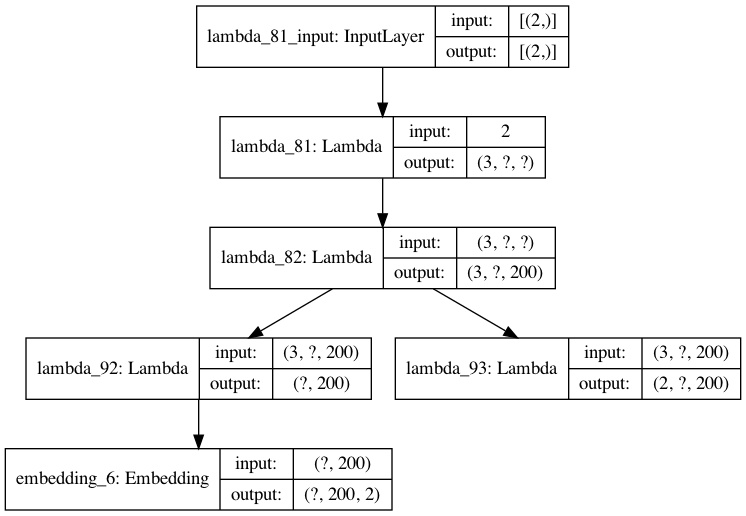

In [542]:
from tensorflow.keras.utils import plot_model

plot_model(wp_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)